In [75]:
import json
import tweepy
import numpy as np
import matplotlib.pyplot as plt
from config import *
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [76]:
news_handles = ['@FoxNews', '@CNN']
sentiment_dict = {
    'fox': [],
    'cnn': []
}

In [77]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [78]:
#This block takes a while to run
for user in news_handles:
    for page in tweepy.Cursor(api.user_timeline, id = user).pages(100):
        text = page[0]._json['text']
        if user == news_handles[0]:
            sentiment_dict['fox'].append(analyzer.polarity_scores(text)["compound"])
        if user == news_handles[1]:
            sentiment_dict['cnn'].append(analyzer.polarity_scores(text)["compound"])

In [79]:
print(sentiment_dict)

{'fox': [0.4019, -0.2263, 0.0, -0.1027, -0.3182, 0.0, 0.0, 0.128, 0.4019, -0.6486, 0.4215, 0.0, -0.5542, 0.34, 0.4767, 0.6124, -0.743, -0.296, -0.3612, 0.6369, 0.4215, 0.0, 0.0, -0.7269, -0.5346, 0.0, -0.024, 0.0, 0.3818, -0.3595, 0.0, 0.0, 0.4215, 0.0, -0.8885, 0.2263, 0.0, 0.0, 0.3182, -0.7845, 0.1761, 0.7506, 0.0, 0.0, -0.5574, 0.0, -0.5423, -0.7269, -0.7717, 0.2263, 0.0, 0.4019, -0.0516, 0.0, -0.0258, 0.0, 0.5267, -0.34, 0.0, -0.6486, 0.0258, -0.128, -0.128, 0.0, 0.1027, -0.0258, 0.0, -0.5994, 0.0, -0.6908, 0.0, 0.6249, 0.0, 0.5255, -0.743, 0.0, 0.5719, 0.0, 0.6523, 0.0, -0.296, -0.6597, 0.0, 0.0, -0.2732, -0.128, 0.0, -0.296, 0.1531, -0.743, -0.7717, -0.3182, -0.5267, -0.6808, 0.2589, -0.0258, 0.2263, -0.4939, 0.765, -0.3612], 'cnn': [0.0, 0.743, 0.0, -0.0516, -0.8519, 0.6249, 0.5106, 0.0, -0.296, 0.0, 0.0258, -0.0772, 0.0, 0.296, -0.2111, 0.0, 0.7635, 0.0, 0.2484, 0.4019, -0.4404, 0.0, -0.6808, 0.0, 0.0, -0.3818, 0.5256, 0.5719, 0.4019, -0.2732, -0.5719, 0.6369, -0.2732, 0.0, -0.

In [80]:
plt.plot(np.arange(len(sentiment_dict['fox'])), 
        sentiment_dict['fox'], marker = 'o', linewidth = 0.5,
        alpha = 0.8)

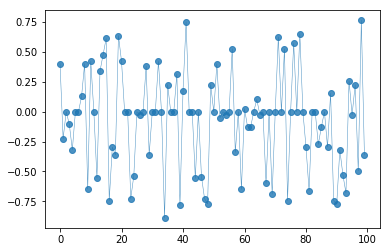

In [81]:
plt.show()